In [2]:
import os
import cv2
import numpy as np

base_dir = os.getcwd()
early_blight_folder_name = 'Tomato___Early_blight'
late_blight_folder_name = 'Tomato___Late_blight'
target_spot_folder_name = 'Tomato___Target_Spot'
mosaic_virus_folder_name = 'Tomato___Tomato_mosaic_virus'
yellow_leaf_folder_name = 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

healthy_folder_name = 'Tomato___healthy'
early_blight_folder_path = os.path.join(base_dir, early_blight_folder_name)
late_blight_folder_path = os.path.join(base_dir, late_blight_folder_name)
target_spot_folder_path = os.path.join(base_dir, target_spot_folder_name)
mosaic_virus_folder_path = os.path.join(base_dir, mosaic_virus_folder_name)
yellow_leaf_folder_path = os.path.join(base_dir, yellow_leaf_folder_name)

healthy_folder_path = os.path.join(base_dir, healthy_folder_name)
early_blight_image_paths = []
late_blight_image_paths = []
target_spot_image_paths = []
mosaic_virus_image_paths = []
yellow_leaf_image_paths = []

healthy_image_paths = []
counter = 0
for root, dirs, files in os.walk(early_blight_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            early_blight_image_paths.append(image_path)
counter = 0
for root, dirs, files in os.walk(late_blight_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            late_blight_image_paths.append(image_path)

counter = 0

for root, dirs, files in os.walk(target_spot_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            target_spot_image_paths.append(image_path)

counter = 0

for root, dirs, files in os.walk(mosaic_virus_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            mosaic_virus_image_paths.append(image_path)

counter = 0

for root, dirs, files in os.walk(yellow_leaf_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            yellow_leaf_image_paths.append(image_path)

counter = 0
# Access healthy images
for root, dirs, files in os.walk(healthy_folder_path):
    for filename in files:
        if counter >= 100:
            break
        counter+=1
        if filename.endswith(('.jpg', '.png')) or os.path.isfile(os.path.join(root, filename)):
            image_path = os.path.join(root, filename)
            healthy_image_paths.append(image_path)


print("ilość obrazów zdrowych liści : ", len(healthy_image_paths))
print("ilość obrazów early blight liści : ", len(early_blight_image_paths))
print("ilość obrazów late blight liści : ", len(late_blight_image_paths))
print("ilość obrazów target spot liści : ", len(target_spot_image_paths))
print("ilość obrazów mosaic virus liści : ", len(mosaic_virus_image_paths))
print("ilość obrazów yellow leaf liści : ", len(yellow_leaf_image_paths))

ilość obrazów zdrowych liści :  100
ilość obrazów early blight liści :  100
ilość obrazów late blight liści :  100
ilość obrazów target spot liści :  100
ilość obrazów mosaic virus liści :  100
ilość obrazów yellow leaf liści :  100


In [3]:
image_size = (224, 224)  # Adjust as per your requirements

# Initialize lists to store preprocessed images and corresponding labels
preprocessed_images = []
labels = []

# Preprocess the images
for image_path in early_blight_image_paths:
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image to the desired size
    image = cv2.resize(image, image_size)
    # Perform any other preprocessing steps, such as normalization

    # Append the preprocessed image and corresponding label to the lists
    preprocessed_images.append(image)
    labels.append(1)  # Assign a label of 1 for diseased leaves

for image_path in healthy_image_paths:
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image to the desired size
    image = cv2.resize(image, image_size)
    # Perform any other preprocessing steps, such as normalization

    # Append the preprocessed image and corresponding label to the lists
    preprocessed_images.append(image)
    labels.append(0)  # Assign a label of 0 for healthy leaves

# Convert the preprocessed images and labels into NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Verify the shape of the preprocessed images and labels
print("Preprocessed Images Shape:", preprocessed_images.shape)
print("Labels Shape:", labels.shape)

Preprocessed Images Shape: (200, 224, 224, 3)
Labels Shape: (200,)


In [4]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels, test_size=0.2, random_state=42)

# Convert the training and testing data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

# Create DataLoader objects for training and testing data
batch_size = 32  # Adjust as per your requirements
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print("dziala")

dziala


In [5]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(AlexNet, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

Epoch [1/10], Train Loss: 0.7076, Train Accuracy: 48.12%, Test Loss: 0.6877, Test Accuracy: 50.00%
Epoch [2/10], Train Loss: 0.6875, Train Accuracy: 51.25%, Test Loss: 0.6776, Test Accuracy: 50.00%


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [3/10], Train Loss: 0.6780, Train Accuracy: 52.50%, Test Loss: 0.6701, Test Accuracy: 47.50%
Epoch [4/10], Train Loss: 0.6714, Train Accuracy: 51.25%, Test Loss: 0.6602, Test Accuracy: 50.00%
Epoch [5/10], Train Loss: 0.6632, Train Accuracy: 58.12%, Test Loss: 0.6502, Test Accuracy: 77.50%
Epoch [6/10], Train Loss: 0.6519, Train Accuracy: 71.88%, Test Loss: 0.6407, Test Accuracy: 77.50%
Epoch [7/10], Train Loss: 0.6418, Train Accuracy: 75.62%, Test Loss: 0.6316, Test Accuracy: 82.50%
Epoch [8/10], Train Loss: 0.6329, Train Accuracy: 80.00%, Test Loss: 0.6222, Test Accuracy: 82.50%
Epoch [9/10], Train Loss: 0.6238, Train Accuracy: 82.50%, Test Loss: 0.6131, Test Accuracy: 82.50%
Epoch [10/10], Train Loss: 0.6148, Train Accuracy: 85.62%, Test Loss: 0.6039, Test Accuracy: 82.50%
Accuracy: 82.50%
Precision: 0.87
Recall: 0.83
F1 Score: 0.82


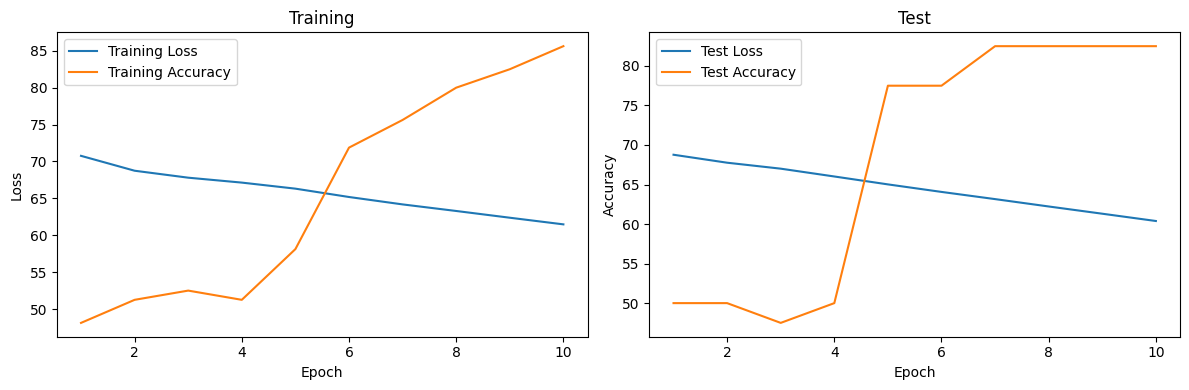

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Define the hyperparameters
num_epochs = 10
learning_rate = 0.00005
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

# Initialize the AlexNet model
model = AlexNet(num_classes=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop
model.train()
for epoch in range(num_epochs):
    train_epoch_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        images = images.permute(0, 3, 1, 2)
        images = images.float()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * train_correct / train_total
    train_epoch_loss /= len(train_loader)
    train_loss_values.append(train_epoch_loss * 100)
    train_accuracy_values.append(train_accuracy)
    
    from sklearn.metrics import precision_score, recall_score, f1_score

    # Evaluation on test set
    model.eval()
    test_epoch_loss = 0.0
    test_correct = 0
    test_total = 0
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.permute(0, 3, 1, 2)
            images = images.float()
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())

    accuracy = sum(true == pred for true, pred in zip(true_labels, predicted_labels)) / len(true_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')

    test_accuracy = 100 * test_correct / test_total
    test_epoch_loss /= len(test_loader)
    test_loss_values.append(test_epoch_loss * 100)
    test_accuracy_values.append(test_accuracy)

    # Print the epoch loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Evaluation on test set
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.permute(0, 3, 1, 2)
        images = images.float()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

accuracy = sum(true == pred for true, pred in zip(true_labels, predicted_labels)) / len(true_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print('Accuracy: {:.2f}%'.format(100 * accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))
torch.save(model.state_dict(), 'model.pth')

# Plotting the loss and accuracy curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs+1), train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), test_loss_values, label='Test Loss')
plt.plot(range(1, num_epochs+1), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test')
plt.legend()

plt.tight_layout()
plt.show()

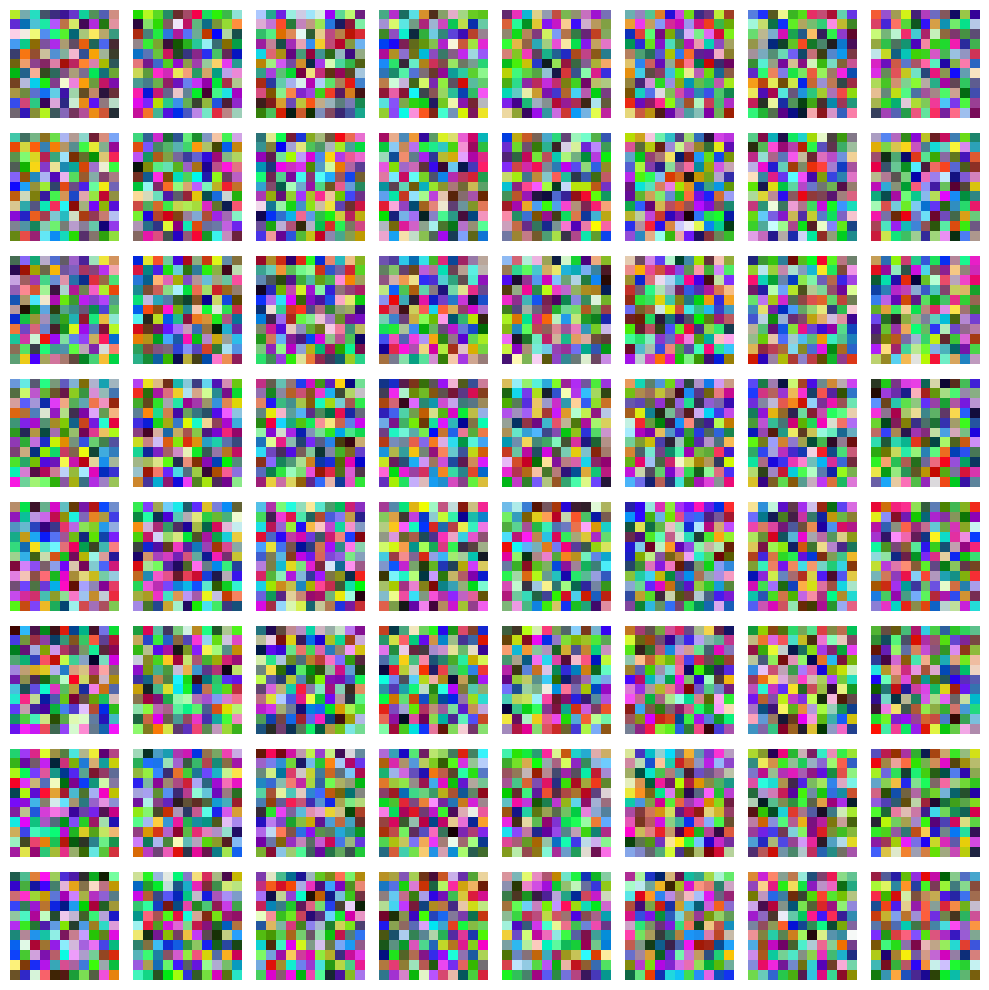

In [7]:
import torch
import matplotlib.pyplot as plt

# Get the weights of the first convolutional layer
conv1_weights = model.features[0].weight.data

# Normalize the weights for visualization
normalized_weights = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())

# Plot the filters
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    filter_image = normalized_weights[i].permute(1, 2, 0).cpu().numpy()
    ax.imshow(filter_image)
    ax.axis('off')

plt.tight_layout()
plt.show()

/home/students/s464981/.local/lib/python3.9/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


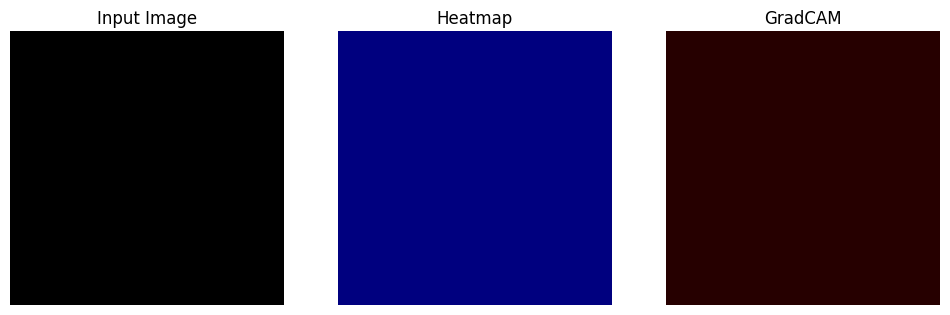

In [15]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torchvision import models
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from captum.attr import LayerGradCam

# Define the GradCAM class
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.feature_maps = None
        self.gradient_maps = None
        
        # Register the forward and backward hooks
        self.register_hooks()

    def register_hooks(self):
        def forward_hook(module, input, output):
            self.feature_maps = output
        
        def backward_hook(module, grad_input, grad_output):
            self.gradient_maps = grad_output[0]

        target_layer_module = self.model._modules[self.target_layer]
        target_layer_module.register_forward_hook(forward_hook)
        target_layer_module.register_backward_hook(backward_hook)

    def generate_heatmap(self, input_image, target_class):
        self.model.zero_grad()
        
        # Forward pass
        input_image = input_image.float()
        input_image = input_image.permute(0, 3, 1, 2)
        output = self.model(input_image)
        
        # Compute the gradients with respect to the target class
        one_hot = torch.zeros_like(output)
        one_hot[:, target_class] = 1
        output.backward(gradient=one_hot, retain_graph=True)
        
        # Global average pooling of the gradients
        gradients = torch.mean(self.gradient_maps, dim=(2, 3))
        
        # Multiply the gradients with the feature maps
        pooled_gradients = torch.unsqueeze(torch.unsqueeze(torch.unsqueeze(gradients, 2), 3), 4)
        weighted_feature_maps = pooled_gradients * self.feature_maps
        
        # Sum the weighted feature maps along the channel dimension
        heatmap = torch.sum(weighted_feature_maps, dim=1).squeeze()
        
        # Normalize the heatmap
        heatmap = nn.functional.relu(heatmap)
        heatmap /= torch.max(heatmap)
        
        return heatmap

# Load the trained model
model = AlexNet(num_classes=2)
model.load_state_dict(torch.load('model.pth'))
model.eval()


# # Create an instance of the GradCAM class
gradcam = GradCAM(model=model, target_layer='features')
# Select a random image from the test set
random_index = np.random.randint(len(X_test))
input_image = X_test[random_index]


# Generate the heatmap for the predicted class
preprocess = transforms.Compose([
transforms.ToTensor(),
])
input_image = preprocess(input_image)
input_image = input_image.unsqueeze(0)
output = model(input_image)
_, predicted_class = torch.max(output, 1)
heatmap = gradcam.generate_heatmap(input_image.permute(0, 2, 3, 1), predicted_class.item())

# Resize the heatmap to the size of the input image
heatmap = cv2.resize(heatmap.detach().numpy(), (input_image.shape[3], input_image.shape[2]))
heatmap = heatmap.astype('uint8')
reduced_heatmap = np.mean(heatmap, axis=2)
heatmap_colormap = cv2.applyColorMap(np.uint8(255 * reduced_heatmap), cv2.COLORMAP_JET)

input_image = input_image.permute(0, 2, 3, 1)
input_image /= 255
gradcam_result = cv2.addWeighted(cv2.cvtColor(np.uint8(255 * input_image[0]), cv2.COLOR_RGB2BGR), 0.7, heatmap_colormap, 0.3, 0)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_image[0])
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reduced_heatmap, cmap='jet')
plt.title('Heatmap')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradcam_result)
plt.title('GradCAM')
plt.axis('off')

plt.show()